In [131]:
from cryptory import Cryptory
import quandl
import time
import datetime

In [132]:
from_date="2013-04-28"
to_date=datetime.date.today().strftime("%Y-%m-%d")
my_cryptory = Cryptory(from_date=from_date)
quandl.ApiConfig.api_key = "eJns-j8GmckFnApoFoAE"

In [133]:
# Daily data from coinmarketcap
bitcoin_market_info = my_cryptory.extract_coinmarketcap("bitcoin")
bitcoin_market_info.loc[bitcoin_market_info['date'] == '2018-01-25' ]

,date,open,high,low,close,volume,marketcap
235,2018-01-25,11421.7,11785.7,11057.4,11259.4,8873169920,192162840576


In [58]:
# Daily subscriber numbers to the bitcoin reddit page
# my_cryptory.extract_reddit_metrics(subreddit="bitcoin", metric="total-subscribers")

In [59]:
# Google Trends - bitcoin search results
# my_cryptory.get_google_trends(kw_list=["bitcoin"])

In [60]:
# dow jones price (market code from yahoo finance)
# my_cryptory.get_stock_prices(market="%5EDJI")

In [61]:
# USD/EUR exchange rate
# my_cryptory.get_exchange_rates(from_currency="USD", to_currency="EUR")

In [159]:
# USD/EUR exchange rate
my_cryptory.get_exchange_rates(from_currency="USD", to_currency="JPY")

,date,exch_rate
0,2018-09-18,0.009147
1,2018-09-17,0.009147
2,2018-09-16,0.009147
3,2018-09-15,0.009147
4,2018-09-14,0.009147
5,2018-09-13,0.009147
6,2018-09-12,0.009147
7,2018-09-11,0.009147
8,2018-09-10,0.009147
9,2018-09-09,0.009147


In [67]:
####################################################################################################################
######## Utility Functions for Data PreProcessing
####################################################################################################################

import seaborn as sns
from cryptory import Cryptory
import datetime
import matplotlib.pyplot as plt
import urllib2 as urllib
import time
import numpy as np
import pandas as pd
from datetime import timedelta
import numpy as np

"""
    Function to make data from blockchain or other sources consistent with btc exchange data
    If data from APIs has data since 2009 we omit those, if no data exist of a date, the previous date value is used
"""
def drop_initial_rows(api, new_col_name, start_date='2013-04-28'):
    # Read data 
    api_range_format= api
    data = pd.read_csv(urllib.urlopen(api_range_format))
    
    # Check if its the Block Size data
    if 'avg' in api:
        # Format columns
        data = pd.DataFrame(data.values, columns=['date', new_col_name])
        data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
        data['date'] = pd.DataFrame(data=data['date'], columns=['date'])

        data['date'] = pd.to_datetime(data['date'])

        # Add dates that do not appear at all, because their blocksize was same as the day before
        data = data.set_index('date').resample('D').ffill()

        # Reset index
        data.index.name='date'
        data = data.reset_index()
        data = data

        # Drop values before 2013, to be consistent with BTC Exchange dataset
        data = data.drop(data[data['date'] < '2013-04-28'].index)
        data = data.reset_index(drop=True)
        return data
        
    else:
        # Get the average block size from blockchain.info; max size ==> 1 MB (by design)
        df = data
        df = pd.DataFrame(df.values, columns=['date', new_col_name])
        df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
        df['date'] = pd.DataFrame(data=df['date'], columns=['date'])
        df['date']=df
        df['date'] = pd.to_datetime(df['date'])
        # Remove rows corresponding to dates before 2013-05-02
        df = df.set_index('date').resample('D').ffill()
        df.index.name='date'
        df.index.names = ['date']
        data = df.reset_index()
        df = data
        df[df['date'] < start_date]

        df = df.drop(df[df['date'] < start_date].index)
        df = df.reset_index(drop=True)
        return df

In [68]:
def rename_columns(prepend_to_name, df):
    df.columns = [df.columns[0]]+ \
                [str(prepend_to_name)+i for i in df.columns[1:]]

In [106]:
####################################################################################################################
######## Extraction of Blockchain Data
####################################################################################################################

# Get the average block size from blockchain.info; max size ==> 1 MB (by design)
block_size_api = "https://blockchain.info/charts/avg-block-size?timespan=all&format=csv" 
avg_block_size = drop_initial_rows(block_size_api, 'avg_block_size')

# Get transactions Daily
txs_api = "https://api.blockchain.info/charts/n-transactions?timespan=all&format=csv" 
txs_data = drop_initial_rows(txs_api, 'transactions')

## Data From Blockchain.info through Quandl API: https://www.quandl.com/data/BCHAIN-Blockchain

# Bitcoin Mining Difficulty
bchain_diff_api = "https://www.quandl.com/api/v3/datasets/BCHAIN/DIFF.csv?api_key=55AcwGQK3qwgy8J3K4Pw"
bchain_diff_data = drop_initial_rows(bchain_diff_api, 'difficulty')

# Bitcoin api.blockchain Size
bchain_blchs_api = "https://www.quandl.com/api/v3/datasets/BCHAIN/BLCHS.csv?api_key=55AcwGQK3qwgy8J3K4Pw"
bchain_blchs_data = drop_initial_rows(bchain_blchs_api, 'bchain_size')

# Rvenue of Bitcoin Miners
bchain_mirev_api = "https://www.quandl.com/api/v3/datasets/BCHAIN/MIREV.csv?api_key=55AcwGQK3qwgy8J3K4Pw"
bchain_mirev_data = drop_initial_rows(bchain_mirev_api, "mining_revenue")

# Bitcoin Hashhttp://localhost:8888/notebooks/Data%20Gathering.ipynb# Rate
bchain_hash_rate_api = "https://www.quandl.com/api/v3/datasets/BCHAIN/CPTRA.csv?api_key=55AcwGQK3qwgy8J3K4Pw"
bchain_hash_rate_data = drop_initial_rows(bchain_hash_rate_api, "hash_rate")
                       
# Bitcoin Cost Per Transaction
bchain_cpt_api = "https://www.quandl.com/api/v3/datasets/BCHAIN/NADDU.csv?api_key=55AcwGQK3qwgy8J3K4Pw"
bchain_cpt_data = drop_initial_rows(bchain_cpt_api, "cost_per_transaction")   

blockchain_data = avg_block_size.merge(txs_data, on='date', how='inner'). \
            merge(bchain_diff_data,on='date' ,how='inner'). \
            merge(bchain_blchs_data, on='date', how='inner'). \
            merge(bchain_mirev_data, on='date', how='inner'). \
            merge(bchain_hash_rate_data, on='date', how='inner'). \
            merge(bchain_cpt_data, on='date', how='inner')


In [169]:
# Gist of it
blockchain_data.head()

,date,avg_block_size,transactions,difficulty,bchain_size,mining_revenue,hash_rate,cost_per_transaction
0,2013-04-28,0.126539,40986,8.9743e+06,6820,572110,13.9587,107554
1,2013-04-29,0.126539,40986,8.9743e+06,6844,645240,12.9025,73687
2,2013-04-30,0.185539,48795,1.00763e+07,6870,525693,10.7735,60887
3,2013-05-01,0.185539,48795,1.00763e+07,6892,442507,8.77347,61672
4,2013-05-02,0.189949,57278,1.00763e+07,6918,383775,6.70022,67744


In [ ]:
####################################################################################################################
######## Extraction of Macroeconomic Data
####################################################################################################################

# S&P 500
s_and_p_stock = my_cryptory.get_stock_prices(market="%5EGSPC")
s_and_p_stock = s_and_p_stock.loc[:,['date', 'close']]
# Rename close column
s_and_p_stock = s_and_p_stock.rename(columns={'close': 'sp_close'})


# Dow and Jones
dow_jones_stock = my_cryptory.get_stock_prices(market="%5EDJI")
dow_jones_stock = dow_jones_stock.loc[:,['date', 'close']]
dow_jones_stock = dow_jones_stock.rename(columns={'close': 'dj_close'})


# Nasdaq
nasdaq_stock = my_cryptory.get_stock_prices(market="%5EIXIC")
nasdaq_stock = nasdaq_stock.loc[:,['date', 'close']]
nasdaq_stock = nasdaq_stock.rename(columns={'close': 'nasdaq_close'})

# Vix
vix_stock = my_cryptory.get_stock_prices(market="%5EVIX")
vix_stock = vix_stock.loc[:,['date', 'close']]
vix_stock = vix_stock.rename(columns={'close': 'vix_close'})

# Commodity Prices
metals_prices = my_cryptory.get_metal_prices()
metals_prices = metals_prices[['date', 'gold_am', 'silver']]

# Oil Price
oil_price = my_cryptory.get_oil_prices()

macro_econ_data = s_and_p_stock.merge(dow_jones_stock,on='date', how='inner') \
                .merge(nasdaq_stock,on='date', how='inner') \
                .merge(vix_stock, on='date', how='inner') \
                .merge(metals_prices,on='date', how='inner') \
                .merge(oil_price, on='date', how='inner')


In [168]:
# Gist of it
macro_econ_data.head()

,date,sp_close,dj_close,nasdaq_close,vix_close,gold_am,silver,oil_price
0,2018-09-18,2901.820068,26149.560547,7964.009766,13.11,1196.8,14.170,67.55
1,2018-09-17,2888.800049,26062.119141,7895.790039,13.68,1196.8,14.170,67.55
2,2018-09-16,2904.979980,26154.669922,8010.040039,12.07,1206.2,14.215,67.55
3,2018-09-15,2904.979980,26154.669922,8010.040039,12.07,1206.2,14.215,67.55
4,2018-09-14,2904.979980,26154.669922,8010.040039,12.07,1206.2,14.215,67.55


In [108]:
####################################################################################################################
######## Getting Exchange Data, Sentiment Data (Reddit & Google Trends)
####################################################################################################################
my_cryptory = Cryptory(from_date="2013-04-28")

btc_market_info = my_cryptory.extract_coinmarketcap('bitcoin')
btc_market_info = bitcoin_market_info.assign(Date=pd.to_datetime(btc_market_info['date']))
pd.DataFrame(btc_market_info).fillna(btc_market_info.mean())
# convert to int
btc_market_info['volume'] = btc_market_info['volume'].astype('int64')
btc_market_info.columns = btc_market_info.columns.str.replace("*", "")
btc_market_info = btc_market_info.assign(Date=pd.to_datetime(btc_market_info['date']))
rename_columns('bt_', btc_market_info)

# Calculate new columns
for coins in ['bt_']: 
    kwargs = { coins+'day_diff': lambda x: (x[coins+'close']-x[coins+'open'])/x[coins+'open']}
    btc_market_info = btc_market_info.assign(**kwargs)

for coins in ['bt_']: 
    kwargs = { coins+'close_off_high': lambda x: 2*(x[coins+'high']- x[coins+'close'])/(x[coins+'high']-x[coins+'low'])-1,
            coins+'volatility': lambda x: (x[coins+'high']- x[coins+'low'])/(x[coins+'open'])}
    btc_market_info = btc_market_info.assign(**kwargs)

# # Get volume, and rest of data

btc_google_trends = my_cryptory.get_google_trends(kw_list=['bitcoin'])
rename_columns('google_trends_', btc_google_trends)

# Leave our reddit for now
# btc_reddit_subscribers = my_cryptory.extract_reddit_metrics(subreddit="bitcoin", 
#                                          metric="total-subscribers")
# rename_columns('reddit_', btc_reddit_subscribers)

# Dow Jones price (market code)
dow_jones_stock = my_cryptory.get_stock_prices(market="%5EDJI")
# Testing purposes
dow_jones_stock = dow_jones_stock.loc[:,['date', 'close']]

# S&P 500
stand_and_poor_stock = my_cryptory.get_stock_prices(market="%SPX")
stand_and_poor_stock = stand_and_poor_stock.loc[:,['date', 'close']]

# Exchange rates
eur_usd_exchange_rate = my_cryptory.get_exchange_rates(from_currency="USD", to_currency="EUR")

# # Left out reddit
# # btc_final = btc_market_info.merge(btc_google_trends, on='date', how='inner').merge(btc_reddit_subscribers,on='date', how='inner'). \
# #             merge(dow_jones_stock,on='date' ,how='inner'). \
# #             merge(eur_usd_exchange_rate, on='date', how='inner'). \
# #             merge(avg_block_size, on='date', how='inner')

btc_final = btc_market_info.merge(btc_google_trends, on='date', how='inner'). \
            merge(dow_jones_stock,on='date' ,how='inner'). \
            merge(eur_usd_exchange_rate, on='date', how='inner'). \
            merge(blockchain_data, on='date', how='inner')

# Get rid of columns we only needed for calculating 'close_off_high' and 'volatility'
btc_final = btc_final[['date','close','google_trends_bitcoin','exch_rate','avg_block_size','transactions', 'difficulty', 'bchain_size', 'mining_revenue','hash_rate','cost_per_transaction']+[coin+metric for coin in ['bt_'] 
                                   for metric in ['close','volume','close_off_high','volatility']]]


# need to reverse the data frame so that subsequent rows represent later timepoints
btc_final = btc_final.sort_values(by='date')

# btc_final = btc_market_info

# btc_final.to_csv('btc_data_reconciliation.csv')

# # Alternatively, we could have scaled with scikit
from sklearn.preprocessing import minmax_scale
import numpy as np
from sklearn.preprocessing import Imputer

mean_imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)

btc_without_date = btc_final.loc[:, btc_final.columns != 'date']

# Train the imputor on the df dataset
mean_imputer = mean_imputer.fit(btc_without_date)

# Apply the imputer to the df dataset
imputed_df = mean_imputer.transform(btc_without_date)

# Get back columns
imputed_df = pd.DataFrame(imputed_df, columns = btc_without_date.columns)

imputed_df[['google_trends_bitcoin','bt_close', 'bt_volume', 'close', 'exch_rate', \
             'avg_block_size', 'transactions', 'difficulty', 'bchain_size', 'mining_revenue','hash_rate','cost_per_transaction']] = \
                minmax_scale(imputed_df[[ 'google_trends_bitcoin','bt_close', 'bt_volume', 'close', 'exch_rate', \
                                        'avg_block_size', 'transactions', 'difficulty', 'bchain_size', 'mining_revenue','hash_rate','cost_per_transaction']])

# Re add date column
imputed_df['date'] = btc_final['date']

# Order by date
imputed_df["date"] = imputed_df["date"].values[::-1]

btc_final=imputed_df

In [109]:
# Get rid of rows where volume is 0
btc_final = btc_final[btc_final['bt_volume']!=0]
# Reindex, starting from 0 
btc_final.index = range(len(btc_final))
# btc_final.reset_index(drop=True)
btc_final.head()

,close,google_trends_bitcoin,exch_rate,avg_block_size,transactions,difficulty,bchain_size,mining_revenue,hash_rate,cost_per_transaction,bt_close,bt_volume,bt_close_off_high,bt_volatility,date
0,0.152114,0.032743,0.961270,0.076629,0.049755,0.000167,0.033398,0.053643,0.337872,0.075238,0.034312,0.001966,0.328118,0.083731,2013-12-27
1,0.152114,0.029554,0.961270,0.076407,0.047740,0.000167,0.033535,0.048815,0.359747,0.055989,0.033939,0.001363,-0.077919,0.056519,2013-12-28
2,0.152114,0.026366,0.961270,0.076407,0.047740,0.000167,0.033671,0.045110,0.324729,0.053680,0.034825,0.000797,-0.791630,0.046934,2013-12-29
3,0.154278,0.027429,0.952632,0.096881,0.069763,0.000167,0.033853,0.062252,0.380326,0.090004,0.035396,0.000869,-0.205615,0.035557,2013-12-30
4,0.160331,0.028491,0.952632,0.096881,0.069763,0.000167,0.034001,0.052828,0.351808,0.068247,0.035286,0.000877,-0.413655,0.029474,2013-12-31


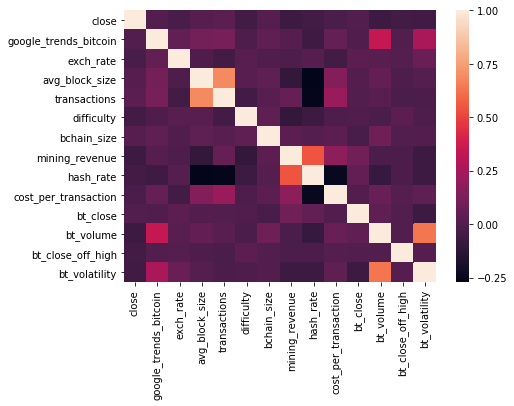

,close,google_trends_bitcoin,exch_rate,avg_block_size,transactions,difficulty,bchain_size,mining_revenue,hash_rate,cost_per_transaction,bt_close,bt_volume,bt_close_off_high,bt_volatility
close,1,0.00064,-0.026,0.012,0.027,-0.046,0.012,-0.063,-0.045,-0.021,0.0012,-0.064,-0.046,-0.052
google_trends_bitcoin,0.00064,1,0.047,0.1,0.11,-0.013,0.045,0.012,-0.059,0.059,-0.008,0.35,-0.00047,0.26
exch_rate,-0.026,0.047,1,-0.011,-0.046,0.018,-0.008,-0.012,0.015,-0.046,0.034,0.026,0.0069,0.075
avg_block_size,0.012,0.1,-0.011,1,0.69,0.016,0.038,-0.1,-0.27,0.15,0.0052,0.053,-0.0093,0.0077
transactions,0.027,0.11,-0.046,0.69,1,-0.048,0.025,0.065,-0.26,0.22,0.0014,0.021,-0.02,-0.014
difficulty,-0.046,-0.013,0.018,0.016,-0.048,1,0.045,-0.1,-0.069,-0.01,-0.0076,-0.019,0.033,-0.013
bchain_size,0.012,0.045,-0.008,0.038,0.025,0.045,1,0.036,0.0079,0.035,-0.025,0.081,-0.0027,0.0017
mining_revenue,-0.063,0.012,-0.012,-0.1,0.065,-0.1,0.036,1,0.55,0.19,0.096,-0.023,-0.018,-0.064
hash_rate,-0.045,-0.059,0.015,-0.27,-0.26,-0.069,0.0079,0.55,1,-0.25,0.047,-0.091,-0.015,-0.064
cost_per_transaction,-0.021,0.059,-0.046,0.15,0.22,-0.01,0.035,0.19,-0.25,1,-0.0029,0.071,0.011,0.038


In [117]:
# Pearson correlation on all attributes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# date column not need for upcoming calculations
all_features_df = btc_final.drop('date', axis=1)
# Percentage change => 
# first calculate: Increase = y_t - y_(t-1) then calculate: %Increace = (Increase-y_(t-1))*100
"""
    %Increase is used both to track the prices of individual securities and 
    of large market indexes, as well as comparing the values of different currencies.  
    Balance sheets with comparative financial statements will generally include the 
    prices of specific assets at different points in time along with the percentage 
    changes over the accompanying periods of time.  
"""
# Compute pairwise correlation of columns, excluding NA/null values
corr = all_features_df.pct_change().corr(method='pearson')
fig, ax = plt.subplots(figsize=(7,5))  
sns.heatmap(corr, 
            xticklabels=[col.replace("_price", "") for col in corr.columns.values],
            yticklabels=[col.replace("_price", "") for col in corr.columns.values],
            annot_kws={"size": 16})
plt.show()


# Table view for readibility
# cmap=sns.diverging_palette(5, 250, as_cmap=True)
cmap=sns.diverging_palette(220, 20, sep=20, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

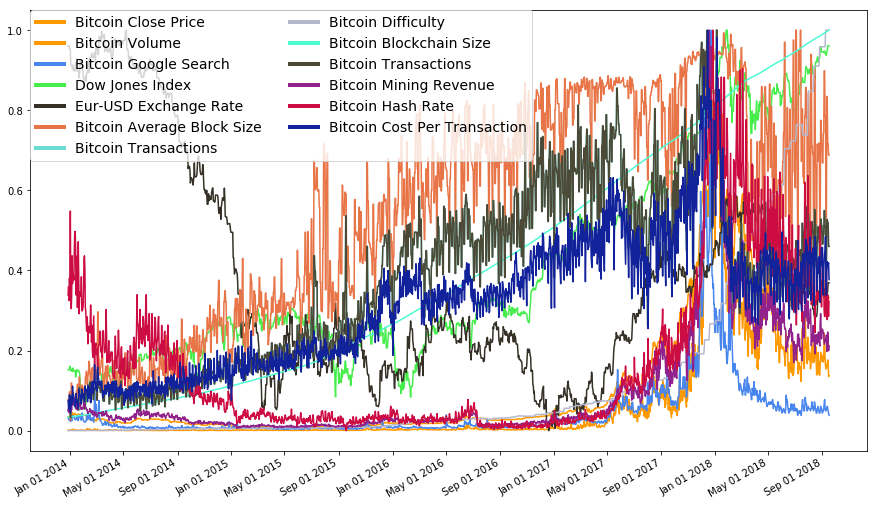

In [120]:
# Visualize all gathered data
%matplotlib inline
fig, ax1 = plt.subplots(1, 1, figsize=(15, 9)) # 1 row 1 col

fig.autofmt_xdate()

ax1.set_xticks([datetime.date(j,i,1) for i in range(1,13,4) for j in range(2013,2019)])
ax1.set_xticklabels([datetime.date(j,i,1).strftime('%b %d %Y') 
                     for i in range(1,13,4) for j in range(2013,2019)])

ax1.plot(btc_final['date'].astype(datetime.datetime),
             btc_final['bt_close'], label='Bitcoin Close Price', color='#FF9900')
ax1.plot(btc_final['date'].astype(datetime.datetime),
             btc_final['bt_volume'], label='Bitcoin Volume', color='#FF9900')
ax1.plot(btc_final['date'].astype(datetime.datetime),
             btc_final['google_trends_bitcoin'], label="Bitcoin Google Search", color='#4885ed')
# ax1.plot(btc_final['date'].astype(datetime.datetime),
#              btc_final['reddit_total_subscribers'], label="Bitcoin Reddit Subscribers", color='#ed475e')
ax1.plot(btc_final['date'].astype(datetime.datetime),
             btc_final['close'], label="Dow Jones Index", color='#47ed4c')
ax1.plot(btc_final['date'].astype(datetime.datetime),
             btc_final['exch_rate'], label="Eur-USD Exchange Rate", color='#353127')
ax1.plot(btc_final['date'].astype(datetime.datetime),
             btc_final['avg_block_size'], label="Bitcoin Average Block Size", color='#e87547')

ax1.plot(btc_final['date'].astype(datetime.datetime),
             btc_final['transactions'], label="Bitcoin Transactions", color='#6bdcd3')
ax1.plot(btc_final['date'].astype(datetime.datetime),
             btc_final['difficulty'], label="Bitcoin Difficulty", color='#b5b8cc')
ax1.plot(btc_final['date'].astype(datetime.datetime),
             btc_final['bchain_size'], label="Bitcoin Blockchain Size", color='#4dfbd3')
ax1.plot(btc_final['date'].astype(datetime.datetime),
             btc_final['transactions'], label="Bitcoin Transactions", color='#4c4937')
ax1.plot(btc_final['date'].astype(datetime.datetime),
             btc_final['mining_revenue'], label="Bitcoin Mining Revenue", color='#91218b')
ax1.plot(btc_final['date'].astype(datetime.datetime),
             btc_final['hash_rate'], label="Bitcoin Hash Rate", color='#cc0c42')
ax1.plot(btc_final['date'].astype(datetime.datetime),
             btc_final['cost_per_transaction'], label="Bitcoin Cost Per Transaction", color='#12229b')

legend_lines = ax1.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0., ncol=2, prop={'size': 14})
for line in legend_lines.get_lines():
    line.set_linewidth(4.0)

plt.show()

In [92]:
split_date = '2018-05-01' # Therefore, the test dataset has values from 2018-01-03 to 2018-09-13

# we don't need the date columns anymore
training_set, test_set = btc_final[btc_final['date']<split_date], btc_final[btc_final['date']>=split_date]
training_set = training_set.drop('date', 1)
test_set = test_set.drop('date', 1)

In [87]:
window_len = 10
norm_cols = ['bt_close','bt_volume']

['bt_close', 'bt_volume']


In [88]:
LSTM_training_inputs = []
for i in range(len(training_set)-window_len):
    temp_set = training_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_training_inputs.append(temp_set)
LSTM_training_outputs = (training_set['bt_close'][window_len:].values/training_set['bt_close'][:-window_len].values)-1

In [89]:
print(LSTM_training_outputs)

[0.32734309 0.11248104 0.14434986 ... 0.14639425 0.13673552 0.04497004]


In [90]:
LSTM_test_inputs = []
for i in range(len(test_set)-window_len):
    temp_set = test_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_test_inputs.append(temp_set)
LSTM_test_outputs = (test_set['bt_close'][window_len:].values/test_set['bt_close'][:-window_len].values)-1
print(LSTM_test_outputs)

[-0.07485929 -0.07974157 -0.1054134  -0.10215285 -0.13767197 -0.13414567
 -0.13742587 -0.10733233 -0.11645556 -0.05912645 -0.00268719 -0.05489388
 -0.13472574 -0.13059701 -0.12203815 -0.12203629 -0.09046972 -0.13626331
 -0.09470763 -0.1310543  -0.11074946 -0.06275029  0.01143351  0.01767676
  0.00463186  0.03813131  0.03914633  0.07672379  0.02057357  0.01709709
 -0.09536423 -0.08490945 -0.14007752 -0.17908811 -0.11269346 -0.15560194
 -0.14551615 -0.15492765 -0.11779278 -0.10210155 -0.00140973 -0.02590923
 -0.0765544  -0.02983696 -0.0759991  -0.03246636 -0.07042719 -0.053203
 -0.12471218 -0.08231578 -0.05553717 -0.05162948  0.0881907   0.06024073
  0.06950596  0.06309267  0.09623351  0.11493422  0.14917541  0.08511562
 -0.01168798  0.00140723 -0.05887331 -0.04512193 -0.04923022 -0.04253726
  0.01033297  0.06836709  0.08901714  0.10865806  0.16356731  0.16195616
  0.19311796  0.23876025  0.3460466   0.28957069  0.18129357  0.11636776
  0.11248023  0.10158912  0.11342081  0.04913031  0.0

In [91]:
# I find it easier to work with numpy arrays rather than pandas dataframes
# especially as we now only have numerical data
LSTM_training_inputs = [np.array(LSTM_training_input) for LSTM_training_input in LSTM_training_inputs]
LSTM_training_inputs = np.array(LSTM_training_inputs)

LSTM_test_inputs = [np.array(LSTM_test_inputs) for LSTM_test_inputs in LSTM_test_inputs]
LSTM_test_inputs = np.array(LSTM_test_inputs)
print(btc_final)

         close  google_trends_bitcoin  exch_rate  avg_block_size  \
0     0.152114               0.032904   0.961270        0.076629   
1     0.152114               0.028754   0.961270        0.076407   
2     0.152114               0.026679   0.961270        0.076407   
3     0.154278               0.027716   0.952632        0.096881   
4     0.160331               0.027716   0.952632        0.096881   
5     0.160331               0.023567   0.952632        0.026115   
6     0.149015               0.026679   0.917804        0.026115   
7     0.151410               0.030829   0.911117        0.119025   
8     0.151410               0.024604   0.911117        0.119025   
9     0.151410               0.029791   0.911117        0.088264   
10    0.147656               0.038091   0.902201        0.088264   
11    0.156507               0.034979   0.913067        0.094984   
12    0.150804               0.033941   0.899972        0.094984   
13    0.149300               0.033941   0.904987

In [323]:
# import the relevant Keras modules
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

def build_model(inputs, output_size, neurons, activ_func="linear",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()
    
    print(inputs.shape[1])
    print(inputs.shape[2])
    
    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

In [324]:
# random seed for reproducibility
np.random.seed(202)
# we'll try to predict the closing price for the next 5 days 
# change this value if you want to make longer/shorter prediction
pred_range = 300
# initialise model architecture
bt_model = build_model(LSTM_training_inputs, output_size=pred_range, neurons = 20)
# model output is next 5 prices normalised to 10th previous closing price
LSTM_training_outputs = []
for i in range(window_len, len(training_set['bt_close'])-pred_range):
    LSTM_training_outputs.append((training_set['bt_close'][i:i+pred_range].values/
                                  training_set['bt_close'].values[i-window_len])-1)
LSTM_training_outputs = np.array(LSTM_training_outputs)
# train model on data
# note: eth_history contains information on the training error per epoch
bt_history = bt_model.fit(LSTM_training_inputs[:-pred_range], LSTM_training_outputs, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)

10
8
Epoch 1/50
 - 11s - loss: 0.4580
Epoch 2/50
 - 10s - loss: 0.3706
Epoch 3/50
 - 16s - loss: 0.3341
Epoch 4/50
 - 12s - loss: 0.3194
Epoch 5/50
 - 7s - loss: 0.3204
Epoch 6/50
 - 9s - loss: 0.3156
Epoch 7/50
 - 10s - loss: 0.3089
Epoch 8/50
 - 9s - loss: 0.3040
Epoch 9/50
 - 8s - loss: 0.2982
Epoch 10/50
 - 6s - loss: 0.3023
Epoch 11/50
 - 8s - loss: 0.2967
Epoch 12/50
 - 10s - loss: 0.2971
Epoch 13/50
 - 7s - loss: 0.2931
Epoch 14/50
 - 7s - loss: 0.2874
Epoch 15/50
 - 9s - loss: 0.2884
Epoch 16/50
 - 7s - loss: 0.2873
Epoch 17/50
 - 7s - loss: 0.2785
Epoch 18/50
 - 8s - loss: 0.2791
Epoch 19/50
 - 8s - loss: 0.2755
Epoch 20/50
 - 8s - loss: 0.2708
Epoch 21/50
 - 7s - loss: 0.2717
Epoch 22/50
 - 7s - loss: 0.2672
Epoch 23/50
 - 7s - loss: 0.2595
Epoch 24/50
 - 8s - loss: 0.2644
Epoch 25/50
 - 7s - loss: 0.2624
Epoch 26/50
 - 7s - loss: 0.2625
Epoch 27/50
 - 8s - loss: 0.2568
Epoch 28/50
 - 7s - loss: 0.2524
Epoch 29/50
 - 7s - loss: 0.2602
Epoch 30/50
 - 7s - loss: 0.2544
Epoch 31

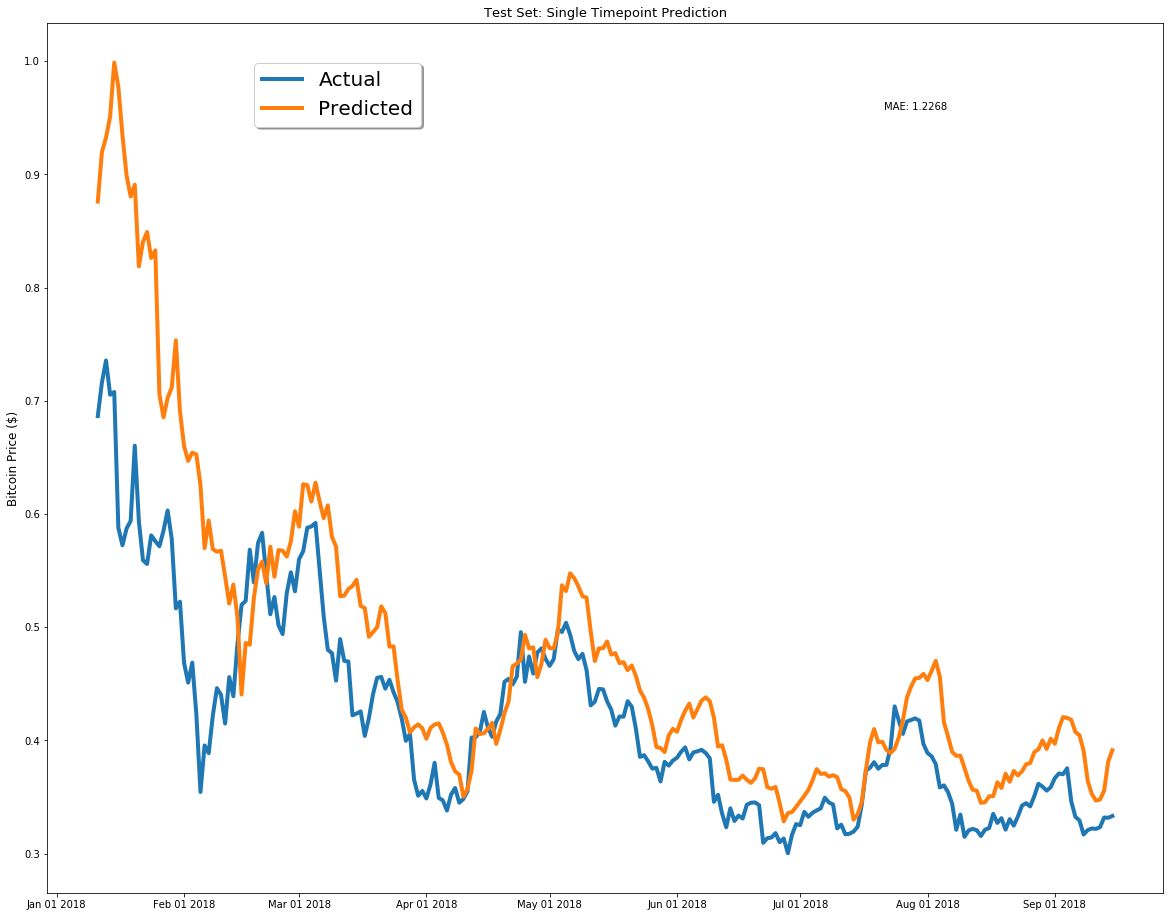

In [325]:
fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(2018,i+1,1) for i in range(12)])
ax1.set_xticklabels([datetime.date(2018,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(btc_final[btc_final['date']>= split_date]['date'][window_len:].astype(datetime.datetime),
         test_set['bt_close'][window_len:], label='Actual')
ax1.plot(btc_final[btc_final['date']>= split_date]['date'][window_len:].astype(datetime.datetime),
         ((np.transpose(bt_model.predict(LSTM_test_inputs))+1) * test_set['bt_close'].values[:-window_len])[0], 
         label='Predicted')
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(bt_model.predict(LSTM_test_inputs))+1)-\
            (test_set['bt_close'].values[window_len:])/(test_set['bt_close'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.15, 1), loc=2, borderaxespad=2, prop={'size': 20}, shadow=True)
plt.show()

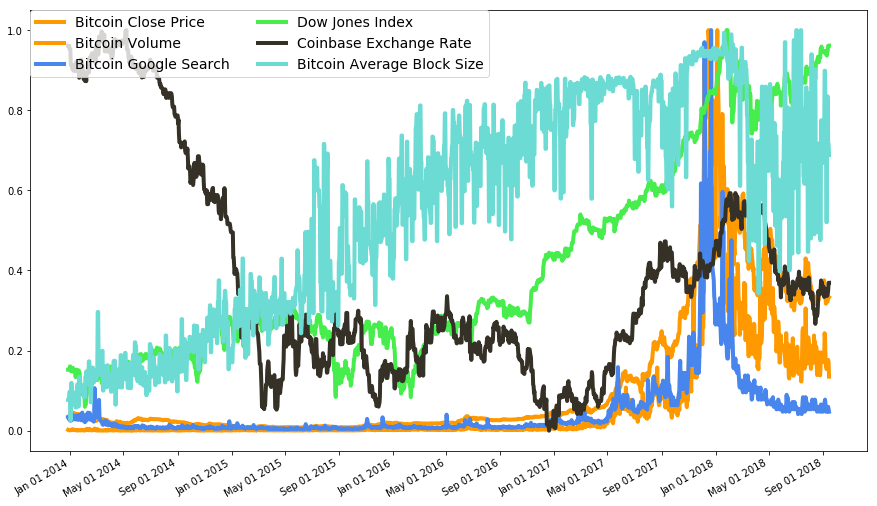

In [327]:
%matplotlib inline
fig, ax1 = plt.subplots(1, 1, figsize=(15, 9)) # 1 row 1 col

fig.autofmt_xdate()

ax1.set_xticks([datetime.date(j,i,1) for i in range(1,13,4) for j in range(2013,2019)])
ax1.set_xticklabels([datetime.date(j,i,1).strftime('%b %d %Y') 
                     for i in range(1,13,4) for j in range(2013,2019)])

ax1.plot(btc_final['date'].astype(datetime.datetime),
             btc_final['bt_close'], label='Bitcoin Close Price', color='#FF9900')
ax1.plot(btc_final['date'].astype(datetime.datetime),
             btc_final['bt_volume'], label='Bitcoin Volume', color='#FF9900')
ax1.plot(btc_final['date'].astype(datetime.datetime),
             btc_final['google_trends_bitcoin'], label="Bitcoin Google Search", color='#4885ed')
# ax1.plot(btc_final['date'].astype(datetime.datetime),
#              btc_final['reddit_total_subscribers'], label="Bitcoin Reddit Subscribers", color='#ed475e')
ax1.plot(btc_final['date'].astype(datetime.datetime),
             btc_final['close'], label="Dow Jones Index", color='#47ed4c')
ax1.plot(btc_final['date'].astype(datetime.datetime),
             btc_final['exch_rate'], label="Coinbase Exchange Rate", color='#353127')
ax1.plot(btc_final['date'].astype(datetime.datetime),
             btc_final['avg_block_size'], label="Bitcoin Average Block Size", color='#6bdbd3')

ax1.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0., ncol=2, prop={'size': 14})
plt.show()

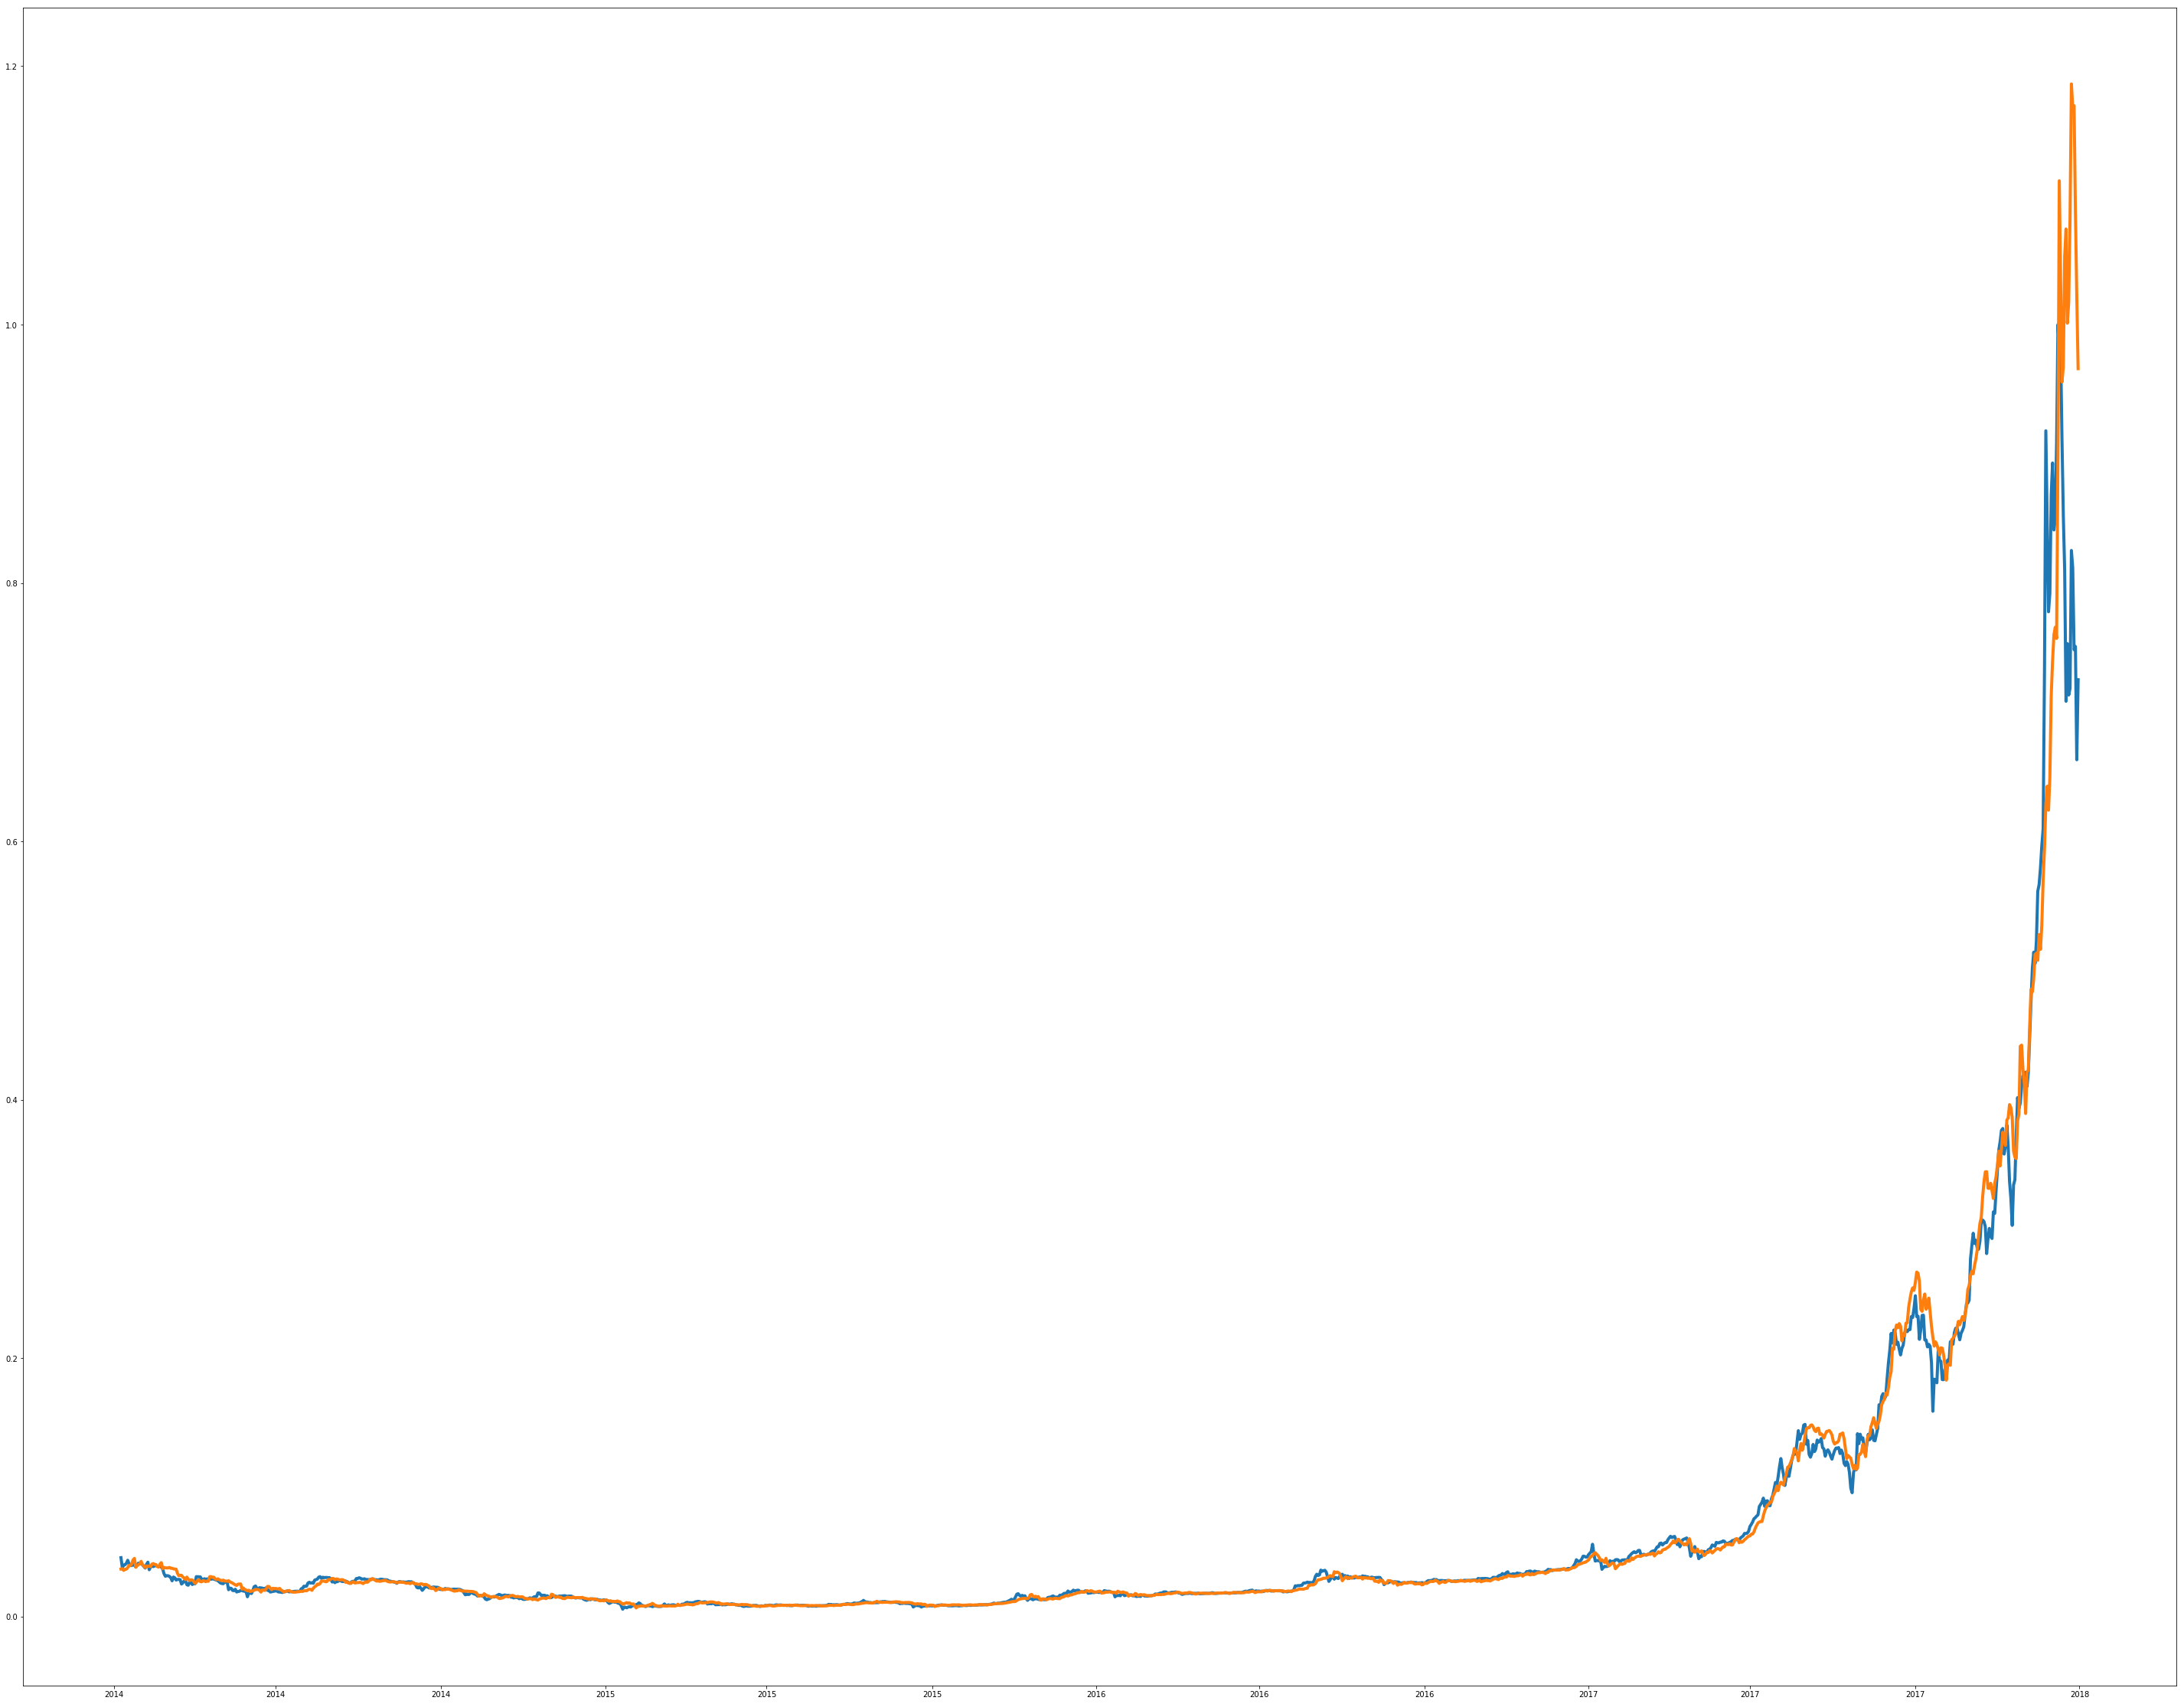

In [328]:
%matplotlib inline
from matplotlib import rcParams # this module controls the default values for plotting in matplotlib
rcParams['font.size'] = 10
rcParams['lines.linewidth'] = 4
rcParams['figure.figsize'] = (20, 16)
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2014,2019) for j in [1,5,9]])
ax1.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2014,2019) for j in [1,5,9]])
ax1.plot(btc_final[btc_final['date']< split_date]['date'][window_len:].astype(datetime.datetime),
         training_set['bt_close'][window_len:], label='Actual')
ax1.plot(btc_final[btc_final['date']< split_date]['date'][window_len:].astype(datetime.datetime),
         ((np.transpose(bt_model.predict(LSTM_training_inputs))+1) * training_set['bt_close'].values[:-window_len])[0], 
         label='Predicted')
ax1.set_title('Training Set: Single Timepoint Prediction')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(bt_model.predict(LSTM_training_inputs))+1)-\
            (training_set['bt_close'].values[window_len:])/(training_set['bt_close'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.legend(bbox_to_anchor=(0.15, 1), loc=2, borderaxespad=2, prop={'size': 20}, shadow=True)
# figure inset code taken from http://akuederle.com/matplotlib-zoomed-up-inset
axins = zoomed_inset_axes(ax1, 2.52, loc=10, bbox_to_anchor=(400, 307)) # zoom-factor: 2.52, location: centre
axins.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
axins.plot(btc_final[btc_final['date']< split_date]['date'][window_len:].astype(datetime.datetime),
         training_set['bt_close'][window_len:], label='Actual')
axins.plot(btc_final[btc_final['date']< split_date]['date'][window_len:].astype(datetime.datetime),
         ((np.transpose(bt_model.predict(LSTM_training_inputs))+1) * training_set['bt_close'].values[:-window_len])[0], 
         label='Predicted')
# axins.set_xlim([datetime.date(2017, 2, 15), datetime.date(2017, 5, 1)])
# axins.set_ylim([920, 1400])
# mark_inset(ax1, axins, loc1=1, loc2=3, fc="none", ec="0.5")
plt.show()

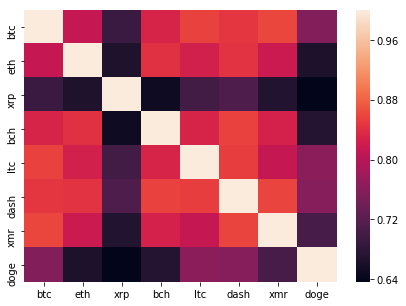

In [21]:
# Pearson correlation on all data sources
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

my_cryptory = Cryptory(from_date="2018-01-01")
all_coins_df = my_cryptory.extract_bitinfocharts("btc")
# coins of interest
bitinfocoins = ["btc", "eth", "xrp", "bch", "ltc", "dash", "xmr", "doge"]
for coin in bitinfocoins[1:]:
    all_coins_df = all_coins_df.merge(my_cryptory.extract_bitinfocharts(coin), on="date", how="left")
# date column not need for upcoming calculations
all_coins_df = all_coins_df.drop('date', axis=1)
# Percentage change => 
# first calculate: Increase = y_t - y_(t-1) then calculate: %Increace = (Increase-y_(t-1))*100
"""
    %Increase is used both to track the prices of individual securities and 
    of large market indexes, as well as comparing the values of different currencies.  
    Balance sheets with comparative financial statements will generally include the 
    prices of specific assets at different points in time along with the percentage 
    changes over the accompanying periods of time.  
"""
# Compute pairwise correlation of columns, excluding NA/null values
corr = all_coins_df.pct_change().corr(method='pearson')
fig, ax = plt.subplots(figsize=(7,5))  
sns.heatmap(corr, 
            xticklabels=[col.replace("_price", "") for col in corr.columns.values],
            yticklabels=[col.replace("_price", "") for col in corr.columns.values],
            annot_kws={"size": 16})
plt.show()

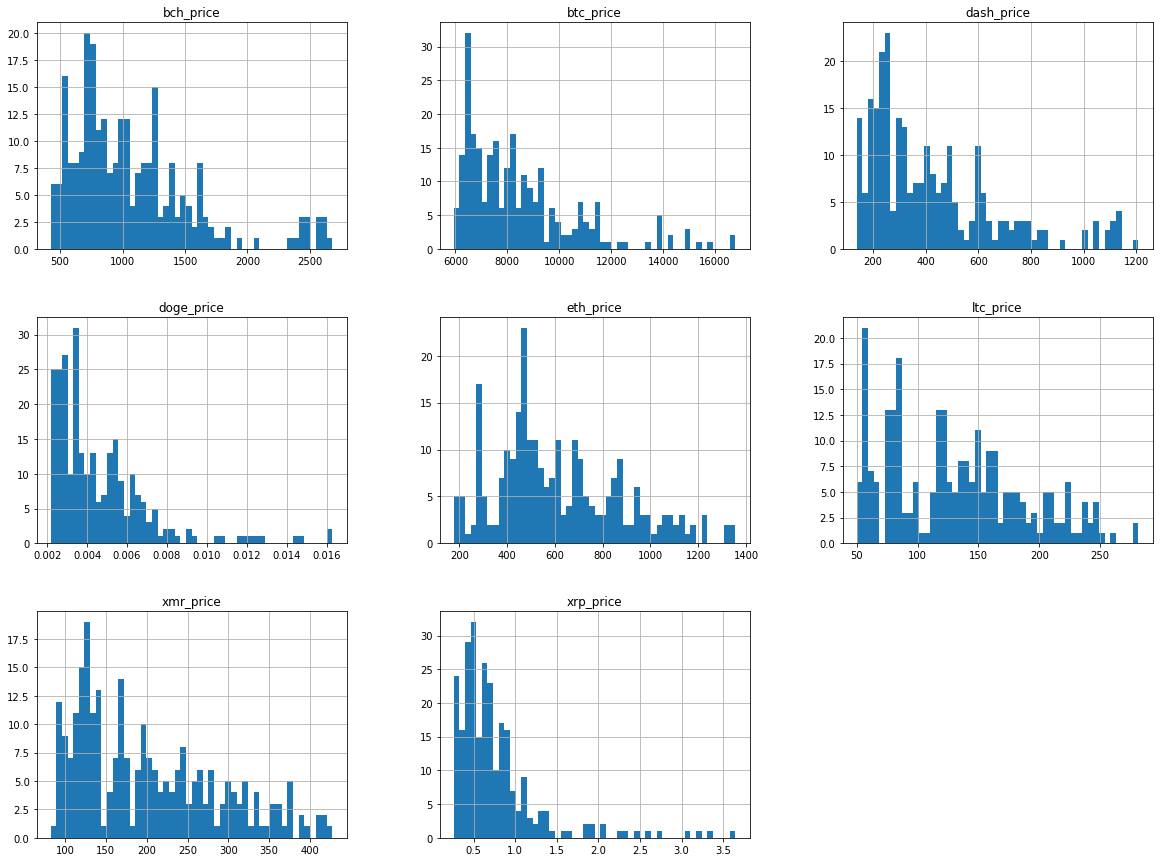

In [22]:
import matplotlib.pyplot as plt
all_coins_df.hist(bins=50, figsize=(20,15))
# print(all_coins_df)
plt.show()